# Data Visualization using Seaborn

## 1. Create a bar chart of most popular starting stations
## 2. Recreate Dual-Axis Line Chart (Seasonality Analysis)
## 3. Create a box plot for a categorical variable Customer Type and Tripduration
## 4. Use a FacetGrid to further analyze the categorical variable

In [2]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
sns.__version__

## Import nyc-citibike data

In [ ]:
df = pd.read_csv('nyc-citibike_data.csv', index_col = 0, low_memory=False)

In [ ]:
df.dtypes

In [139]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,year_month,date,avgTemp,_merge
0,5772778972800B87,electric_bike,2023-12-20 06:18:04.187,2023-12-20 06:24:50.461,W 41 St & 8 Ave,6602.03,Madison Ave & E 26 St,6131.12,member,2023-12,2023-12-20,2.3,both
1,32DD834BEA2ABA5B,classic_bike,2023-12-21 16:15:52.308,2023-12-21 16:21:22.124,46 Ave & 5 St,6286.02,44 Dr & Jackson Ave,6352.01,member,2023-12,2023-12-21,3.6,both
2,3B6B1AA2B94A01D1,classic_bike,2023-12-07 11:49:31.277,2023-12-07 11:56:07.264,46 Ave & 5 St,6286.02,44 Dr & Jackson Ave,6352.01,member,2023-12,2023-12-07,2.1,both
3,A8F4C66161031B63,electric_bike,2023-12-26 06:17:43.385,2023-12-26 06:24:11.386,W 41 St & 8 Ave,6602.03,Madison Ave & E 26 St,6131.12,member,2023-12,2023-12-26,7.1,both
4,A6176AFE373FB4C8,electric_bike,2023-12-21 06:58:24.078,2023-12-21 07:04:17.045,E 53 St & 3 Ave,6617.02,1 Ave & E 68 St,6822.09,member,2023-12,2023-12-21,3.6,both


## Set Theme, Style, and Palette

In [140]:
# Convert necessary columns
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['date'] = pd.to_datetime(df['date'])

In [141]:
# Set a global theme for all plots
sns.set_theme(style = "white", font_scale=1.2)
# Create custom color palette
custom_palette = sns.color_palette("Blues_r", n_colors=20)

## Bar Chart — Most Frequented Starting Stations

/var/folders/pc/m18p0brs39jby00y8tcmjty00000gn/T/ipykernel_50606/1506197784.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stations.values, y=top_stations.index, palette=custom_palette)


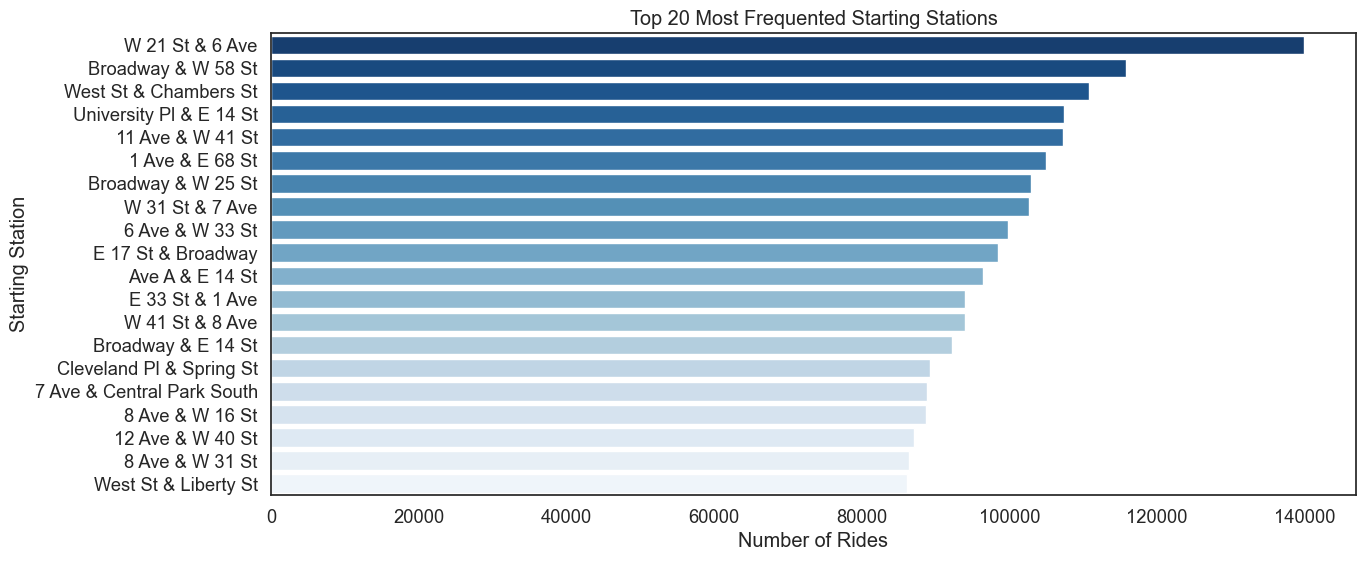

In [142]:
# Find top 20 most popular start stations
top_stations = df['start_station_name'].value_counts().head(20)
# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=top_stations.values, y=top_stations.index, palette=custom_palette)
plt.title('Top 20 Most Frequented Starting Stations')
plt.xlabel('Number of Rides')
plt.ylabel('Starting Station')
plt.grid(False)
plt.show()

## Dual Axis Line Chart — Seasonality

In [143]:
# Create trip counts
trip_counts = df.groupby('date').size().reset_index(name='trip_count')

# Merge trip counts back to df (if necessary)
df_weather = df[['date', 'avgTemp']].drop_duplicates()
df_weather = pd.merge(df_weather, trip_counts, on='date', how='left').set_index('date')

In [144]:
df_weather.head(5)

,avgTemp,trip_count
date,,
2023-12-20,2.3,80591
2023-12-21,3.6,75004
2023-12-07,2.1,85795
2023-12-26,7.1,50807
2023-12-15,7.2,102753


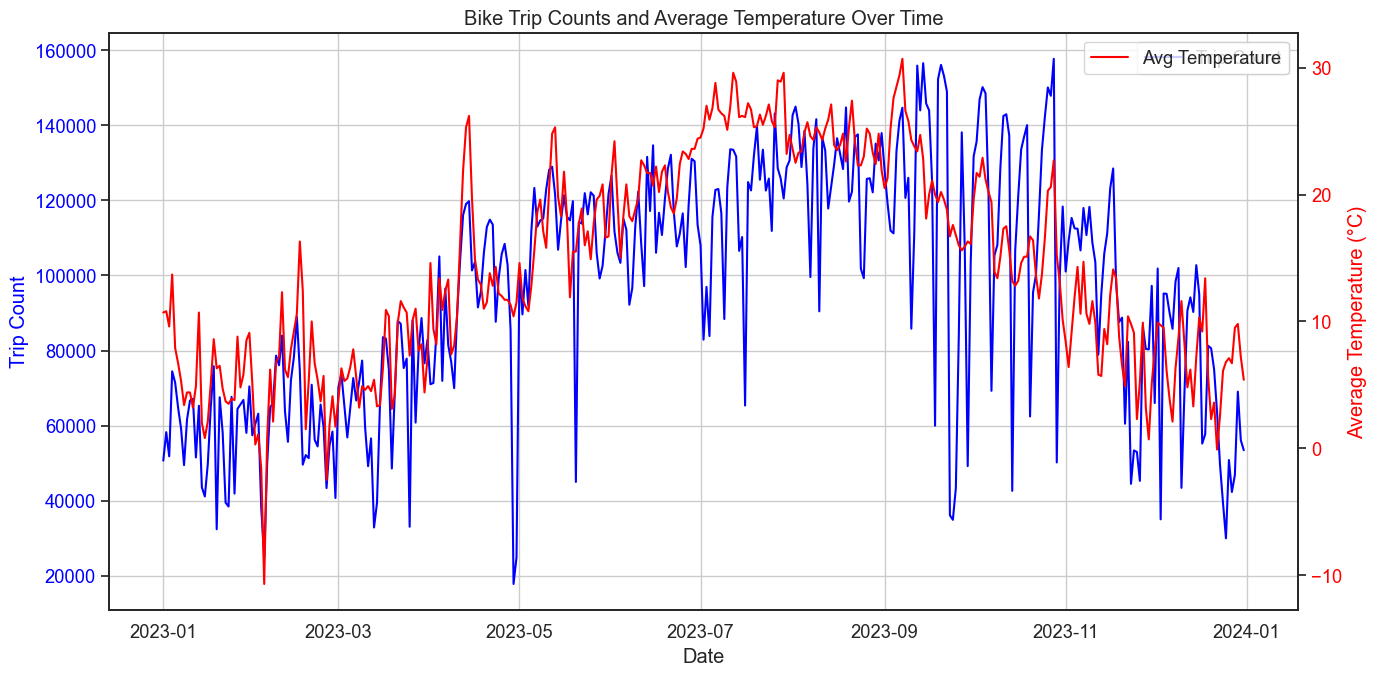

In [145]:
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(14,7))

# Left y-axis: Trip count
sns.lineplot(ax=ax1, x=df_weather.index, y='trip_count', data=df_weather, color='blue', label='Trip Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Trip Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis
ax2 = ax1.twinx()

# Right y-axis: Avg Temperature
sns.lineplot(ax=ax2, x=df_weather.index, y='avgTemp', data=df_weather, color='red', label='Avg Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title
plt.title('Bike Trip Counts and Average Temperature Over Time')

# Improve layout
fig.tight_layout()

# Show plot
plt.show()

In [1]:
df_weather.to_csv('trip_weather.csv')

NameError: name 'df_weather' is not defined

## Box Plot — Categorical Variable (Customer Type and Tripduration)

In [146]:
df['tripduration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60  # in minutes

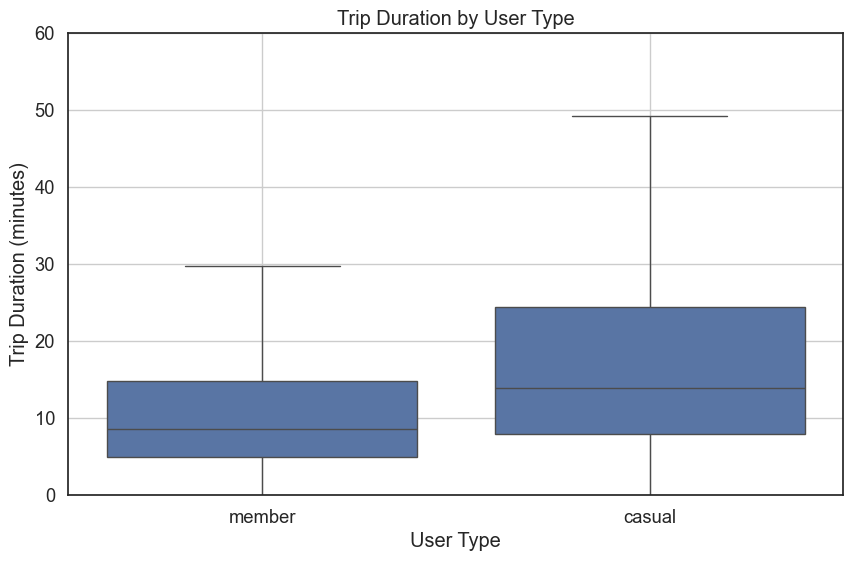

In [147]:
plt.figure(figsize=(10,6))
sns.boxplot(x='member_casual', y='tripduration', data=df, showfliers=False)
plt.ylim(0, 60)
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.grid(True)
plt.show()

### Box Plot Analysis

#### The box plot comparing trip duration by user type reveals that casual users tend to have longer trip durations compared to members. 
#### The median trip duration for casual users is significantly higher, and they show a wider spread in ride times, indicating more variability in their trips.
#### In contrast, members have shorter and more consistent trip durations, suggesting regular commuting patterns.
#### Outliers are more common among casual users, likely reflecting tourists or leisure riders taking unusually long rides.
#### Overall, the box plot highlights distinct usage patterns between the two user groups.

## FacetGrid — Deeper Analysis of the Categorical Variable

In [148]:
#df['month'] = df['started_at'].dt.month_name()

In [149]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' column to ordered categorical
df['month'] = pd.Categorical(df['started_at'].dt.month_name(), categories=month_order, ordered=True)

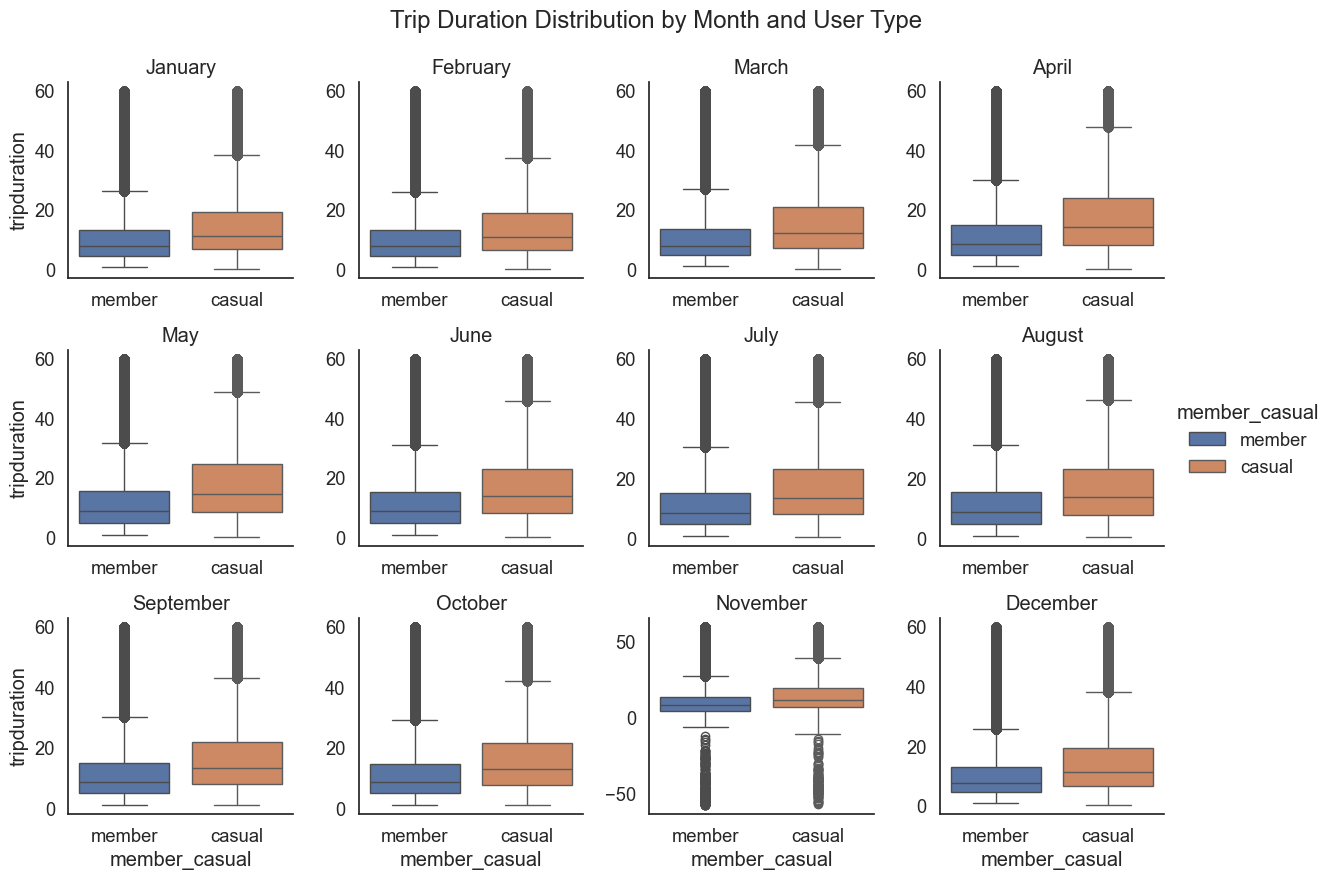

In [150]:
# Focus only on trips shorter than 60 minutes
filtered_df = df[df['tripduration'] < 60]

g = sns.FacetGrid(filtered_df, col="month", col_wrap=4, hue="member_casual", sharex=False, sharey=False)
g.map_dataframe(sns.boxplot, x="member_casual", y="tripduration")
g.add_legend()
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Trip Duration Distribution by Month and User Type')
plt.show()

### FacetGrid Insight:

#### The FacetGrid plot, by splitting trip duration by month and user type, helps identify seasonal trends. 

#### It shows casual users generally take longer rides during warmer months from April to September, suggesting an increase in leisure or tourism-related biking. 

#### Meanwhile, members maintain more consistent, shorter trips across all months, reinforcing the idea that members primarily use the bikes for commuting rather than recreation.